# 线性回归：L1和L2
-------------------------------

本函数展示如何基于矩阵求逆使用TensorFlow，求解线性回归问题。

理解损失函数对算法收敛性的影响是非常关键的（损失函数是指导机器学习算法的优化目标）。这里我们描述L1和L2损失函数是如何影响线性回归中的收敛性的。我们将使用前面章节中一样的iris数据集，而且我们通过改变我们的损失函数和学习速率来看看它们对应的收敛性如何改变。

<img src="../images/04_L1_L2_learningrates.png" width="512">

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

/home/zhangxin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# L1损失
--------------

这里，我们描述使用L1损失函数的线性回归问题。在本节后面，我们将描述使用L2损失函数的线性回归问题。

线性最小均方的L1损失函数方程为：

$$S = \sum_{i=1}^{N}\left| y_{i} - \hat{y_{i}} \right|$$

其中$N$是数据点的数量，$y_i$是第$i$个实际的$y$值。$\hat y_i$是预测的第$i$个$y$值。

In [2]:
sess = tf.Session()

In [3]:
# iris.data = [(花萼长度，花萼宽度，花瓣长度，花瓣宽度)]
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

与前几节相同的模型参数。

一个需要注意的重要参数是学习速率。如果学习速率太大，模型将不会收敛。如果学习速率太小，模型收敛的过慢。

这里设置了两个学习速率来展示学习过程收敛和不收敛两种情况。

学习速率0.35以下学习过程可以收敛。为了显示不收敛的情况，我们可以将学习速率设置为0.4以上。

In [4]:
batch_size = 25
learning_rate = 0.1 # 在0.4或者更大的情况下学习过程将不会收敛
iterations = 50

标准流水线，设置占位符、模型变量和模型运算。

In [5]:
# 占位符
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 变量
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 前向传播
model_output = tf.add(tf.matmul(x_data, A), b)

标准流水线，损失函数（L1损失）和优化函数。然后初始化模型变量。

In [6]:
# 声明损失函数
loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))

# 声明优化器（用来优化损失函数）
my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l1 = my_opt_l1.minimize(loss_l1)

# 初始化变量
init = tf.global_variables_initializer()
sess.run(init)

In [7]:
# 迭代优化
loss_vec_l1 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l1 = sess.run(loss_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l1.append(temp_loss_l1)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))

Step #25 A = [[2.7466252]] b = [[1.6057073]]
Step #50 A = [[2.4294248]] b = [[2.4417078]]


# L2损失函数
--------

这里我们描述使用L2损失函数的线性回归。

线性最小均方的L2损失函数方程为：

$$S = \sum_{i=1}^{N}\left( y_{i} - \hat{y_{i}} \right)^{2}$$

其中𝑁是数据点的数量，$y_i$是第𝑖个实际的𝑦值。$\hat y_i$是预测的第𝑖个𝑦值。

In [8]:
# L2损失
# 复位计算图，这步比较重要
ops.reset_default_graph()

# 创建计算图
sess = tf.Session()

In [9]:
# 占位符
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 变量
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 模型运算
model_output = tf.add(tf.matmul(x_data, A), b)

In [10]:
# 损失函数
loss_l2 = tf.reduce_mean(tf.square(y_target - model_output))

# 优化器
my_opt_l2 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l2 = my_opt_l2.minimize(loss_l2)

# 初始化变量
init = tf.global_variables_initializer()
sess.run(init)

In [11]:
loss_vec_l2 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l2, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l2 = sess.run(loss_l2, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l2.append(temp_loss_l2)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))

Step #25 A = [[1.985545]] b = [[3.0844545]]
Step #50 A = [[1.3598483]] b = [[4.187976]]


画出线性回归问题的L1损失和L2损失的对应的损失变化曲线。

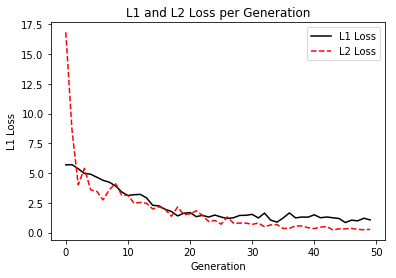

In [12]:
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec_l2, 'r--', label='L2 Loss')
plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()